# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

# Student Name:$\color{green}{\text{Tesheena}}$ [git repo](https://github.com/tsngh/article-summarizer)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### $\color{green}{\text{Prerequsites Check}}$

In [3]:

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
executing          2.0.1
fonttools          4.51.0
html5lib           1.1
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy              1.26.4
packagi

### $\color{green}{\text{Question 1}}$

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project) Article = "https://www.forbes.com/sites/forbesbusinesscouncil/2023/02/02/how-ai-is-cropping-up-in-the-agriculture-industry/"


In [150]:
import requests
from bs4 import BeautifulSoup
import pickle

#url to extract file from
url = "https://www.forbes.com/sites/forbesbusinesscouncil/2023/02/02/how-ai-is-cropping-up-in-the-agriculture-industry/"
response = requests.get(url)
#parse html content
soup = BeautifulSoup(response.content, "html.parser")
#find article content
article_content = soup.find("article").decode_contents()
#dump to pkl
with open("article.pkl","wb") as file:
    pickle.dump(article_content,file)

#save to HTML file
with open("article.html", "w", encoding="utf-8") as file:
    file.write(article_content)
#if successful print message
    print("Article content successfully saved html")

#save as text file
with open('article.txt', 'w', encoding='utf-8') as file:
    file.write(article_text)



Article content successfully saved html


### $\color{green}{\text{Question 2}}$

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [151]:
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
from textblob import TextBlob

# Read HTML source from file created
with open("article.pkl", "rb") as file:
    article_html = pickle.load(file)

soup = BeautifulSoup(article_html, "html.parser")

article_element = soup.find("article")
if article_element:
    text = article_element.get_text()
else:
    text = soup.get_text()

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

doc = nlp(text)
polarity = doc._.blob.polarity
sent_number = len(list(doc._.blob.sentences))

print("Polarity score is:", polarity)
print("Number of sentences in article:", sent_number)


Polarity score is: 0.12189016602809706
Number of sentences in article: 43


### $\color{green}{\text{Question 3}}$

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [152]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

#load article
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
#remove noise
tokens = [token.lower_ for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
token_counts = Counter (tokens)

#top 5 common and frequencies most to least
print("The 5 most common tokens and their frequencies are:")
for token, count in token_counts.most_common(5):
    print(f"-{token}: {count}")

#all tokens and frequencies most to least
print("\nAll tokens and their frequencies:")
for token, count in token_counts.most_common():
    print(f"-{token}: {count}")

The 5 most common tokens and their frequencies are:
-ai: 14
-food: 10
-16: 8
-data: 6
-production: 6

All tokens and their frequencies:
-ai: 14
-food: 10
-16: 8
-data: 6
-production: 6
-water: 6
-technology: 5
-crops: 5
-waste: 5
-today: 4
-growth: 4
-intelligence: 4
-farmers: 4
-combine: 4
-vision: 4
-drive: 3
-need: 3
-business: 3
-population: 3
-billion: 3
-artificial: 3
-resources: 3
-energy: 3
-farming: 3
-labor: 3
-crop: 3
-like: 3
-computer: 3
-accounts: 3
-wasted: 3
-provide: 3
-strategies: 2
-real: 2
-businesses: 2
-generational: 2
-agriculture: 2
-councils: 2
-forbes: 2
-humans: 2
-planet: 2
-years: 2
-feed: 2
-people: 2
-john: 2
-mccarthy: 2
-making: 2
-growing: 2
-requires: 2
-world: 2
-climate: 2
-change: 2
-agricultural: 2
-weather: 2
-autonomous: 2
-industry: 2
-inspection: 2
-adjust: 2
-environment: 2
-nutrition: 2
-use: 2
-human: 2
-high: 2
-yield: 2
-savings: 2
-according: 2
-total: 2
-global: 2
-land: 2
-decision: 2
-help: 2
-increasing: 2
-sensors: 2
-images: 2
-lig

### $\color{green}{\text{Question 4}}$

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [153]:
#load into trained spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
#remove noise
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
lemma_counts = Counter(lemmas)

#top 5 common and frequencies most to least
print("The 5 most common lemmas and their frequencies are:")
for lemma, count in lemma_counts.most_common(5):
    print(f"-{lemma}: {count}")

#all lemmas and frequencies most to least
print("\nAll lemmas and their frequencies:")
for lemma, count in lemma_counts.most_common():
    print(f"-{lemma}: {count}")

The 5 most common lemmas and their frequencies are:
-ai: 14
-food: 10
-crop: 9
-16: 8
-waste: 8

All lemmas and their frequencies:
-ai: 14
-food: 10
-crop: 9
-16: 8
-waste: 8
-datum: 6
-technology: 6
-production: 6
-water: 6
-business: 5
-today: 4
-drive: 4
-need: 4
-human: 4
-growth: 4
-intelligence: 4
-increase: 4
-farmer: 4
-combine: 4
-computer: 4
-vision: 4
-population: 3
-billion: 3
-year: 3
-artificial: 3
-require: 3
-change: 3
-resource: 3
-energy: 3
-farming: 3
-labor: 3
-example: 3
-like: 3
-use: 3
-utilize: 3
-image: 3
-provide: 3
-strategy: 2
-real: 2
-generational: 2
-way: 2
-agriculture: 2
-councils: 2
-forbes: 2
-planet: 2
-feed: 2
-people: 2
-john: 2
-mccarthy: 2
-make: 2
-machine: 2
-world: 2
-climate: 2
-agricultural: 2
-cycle: 2
-weather: 2
-impact: 2
-farm: 2
-autonomous: 2
-industry: 2
-include: 2
-robot: 2
-inspection: 2
-adjust: 2
-environment: 2
-nutrition: 2
-differentiate: 2
-high: 2
-yield: 2
-account: 2
-accord: 2
-total: 2
-global: 2
-land: 2
-lead: 2
-deci

### $\color{green}{\text{Question 5}}$

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

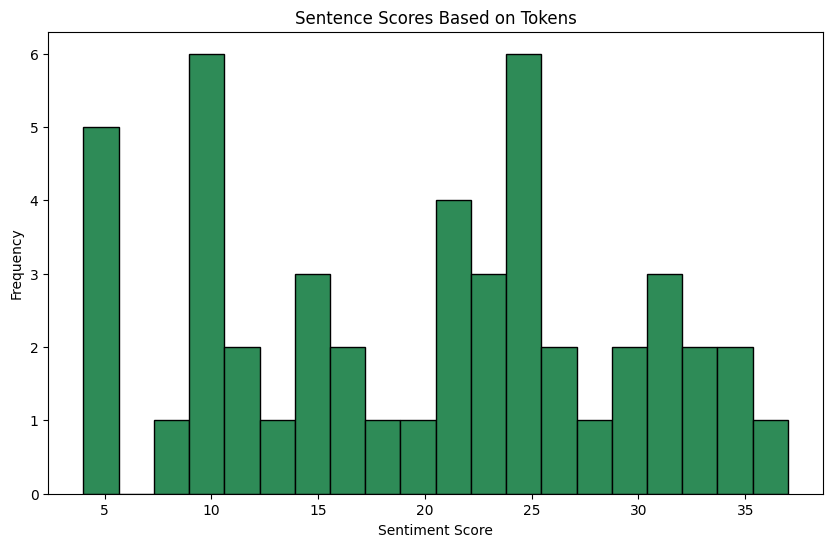

I would say the range of the score is distributed evenly with most being in the middle


In [154]:
import matplotlib.pyplot as plt

doc= nlp(text)

token_scores = []
for sent in doc.sents:
    number_tokens = len([token for token in sent if token.is_alpha])
    token_scores.append(number_tokens)

#histogram
plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=20, color ="seagreen", edgecolor="black")
plt.title("Sentence Scores Based on Tokens")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()
print("I would say the range of the score is distributed evenly with most being in the middle")

### $\color{green}{\text{Question 6}}$

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

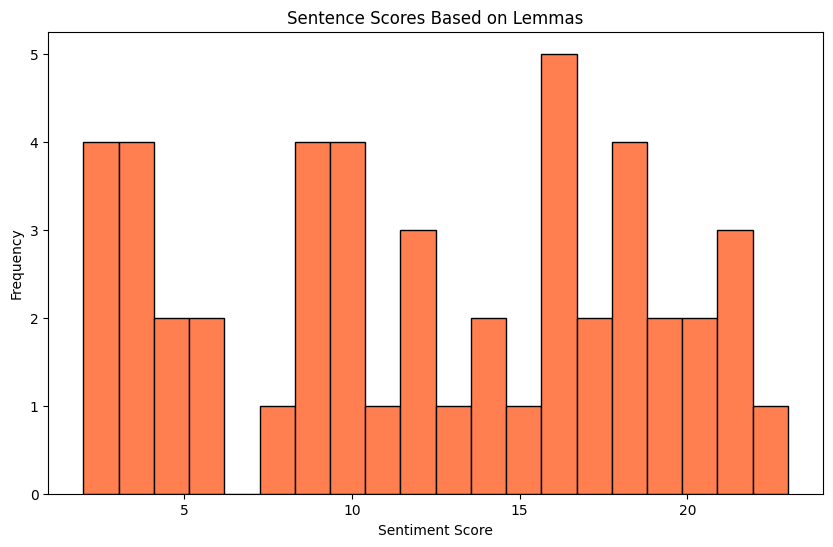

Most of the score is in groups in the lowest 3/4 with the least being in the upper range


In [155]:
import matplotlib.pyplot as plt

doc= nlp(text)

lemma_scores = []
for sentence in doc.sents:
    number_lemmas = [token.lemma_.lower() for token in sentence if not token.is_stop and not token.is_punct and not token.text.isspace()]
    score = len(set(number_lemmas))
    lemma_scores.append(score)

#histogram
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color ="coral", edgecolor="black")
plt.title("Sentence Scores Based on Lemmas")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()
print("Most of the score is in groups in the lowest 3/4 with the least being in the upper range")

### $\color{green}{\text{Question 7}}$

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 25
* Cutoff Score (lemmas): 18

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

### $\color{green}{\text{Question 8}}$

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)

In [176]:
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

# read the article from the file
with open("article.txt", "r", encoding="utf-8") as file:
    article = file.read()

doc = nlp(article)

# calculate the number of sentences to include in the summary aprrox. 32%
total_sentences = sum(1 for _ in doc.sents)
num_sentences_to_include = max(1, int(total_sentences * 0.32))

# generate the summary
summary_token = []
for sent in doc.sents:
    token_count = len([token for token in sent if not token.is_stop and not token.is_punct])
    if token_count > 25:
        summary_token.append(sent.text.strip())
        if len(summary_token) >= num_sentences_to_include:
            break

# Print the summary
print("Article summary:")
print(" ".join(summary_token))



Article summary:
More From ForbesApr 15, 2024,10:30am EDTJob Security: Five Ways To Build Your Brand And Become More ResilientApr 15, 2024,10:15am EDTNavigating Mental Health Challenges As A Digital Entrepreneur: The Role Of Financial Inclusion, Technology And MentorshipApr 15, 2024,10:00am EDTCross-Channel Marketing In 2024: Five Insights And RecommendationsApr 15, 2024,09:45am EDTWhy Healthcare Interoperability Shouldn't Force Professionals To Choose SidesApr 15, 2024,09:30am EDT6 Strategies To Support Healthcare Professionals' Mental HealthApr 15, 2024,09:15am EDTIt’s Never Too Soon To Talk About Financial Wellness ProgramsApr 15, 2024,09:00am EDTAI Utopian Or Dystopian—It's Time To Jump InApr 15, 2024,08:45am


### $\color{green}{\text{Question 9}}$

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [181]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

summary_text = " ".join(summary_token)
doc = nlp(summary_text)

#polarity score 
polarity_score = doc._.polarity

print("Polarity score of summary:", polarity_score)

#number of sentences in the summary
number_sentence = len(list(doc.sents))

print("Number of sentences in summary:", number_sentence)



Polarity score of summary: 0.1142857142857143
Number of sentences in summary: 2


### $\color{green}{\text{Question 10}}$

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [183]:
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

#read the article from the file
with open("article.txt", "r", encoding="utf-8") as file:
    article = file.read()
doc = nlp(article)

#calculate the number of sentences to include in the summary aprrox. 28%
total_sentences = sum(1 for _ in doc.sents)
num_sentences_to_include = max(1, int(total_sentences * 0.28))

#Generate the summary
summary_lemma = []
for sent in doc.sents:
    lemma_count = len([token for token in sent if not token.is_stop and not token.is_punct])
    if lemma_count > 18:
        summary_lemma.append(sent.text.strip())
        if len(summary_lemma) >= num_sentences_to_include:
            break

# Print the summary
print("Article summary:")
print(" ".join(summary_lemma))


Article summary:
More From ForbesApr 15, 2024,10:30am EDTJob Security: Five Ways To Build Your Brand And Become More ResilientApr 15, 2024,10:15am EDTNavigating Mental Health Challenges As A Digital Entrepreneur: The Role Of Financial Inclusion, Technology And MentorshipApr 15, 2024,10:00am EDTCross-Channel Marketing In 2024: Five Insights And RecommendationsApr 15, 2024,09:45am EDTWhy Healthcare Interoperability Shouldn't Force Professionals To Choose SidesApr 15, 2024,09:30am EDT6 Strategies To Support Healthcare Professionals' Mental HealthApr 15, 2024,09:15am EDTIt’s Never Too Soon To Talk About Financial Wellness ProgramsApr 15, 2024,09:00am EDTAI Utopian Or Dystopian—It's Time To Jump InApr 15, 2024,08:45am Funding Your Concept From Startup To ExitEdit StoryForbesSmall BusinessHow AI Is Cropping Up In The Agriculture IndustryWendy GonzalezForbes Councils MemberForbes Business CouncilCOUNCIL POSTExpertise from Forbes Councils members, operated under license. Opinions expressed are

### $\color{green}{\text{Question 11}}$

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [184]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

summary_text = " ".join(summary_lemma)
doc = nlp(summary_text)

#polarity score 
polarity_score = doc._.polarity

print("Polarity score of summary:", polarity_score)

#number of sentences in the summary
number_sentence = len(list(doc.sents))

print("Number of sentences in summary:", number_sentence)



Polarity score of summary: 0.08295138888888892
Number of sentences in summary: 11


### $\color{green}{\text{Question 12}}$

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  


### Original article:
Polarity score is: 0.12189016602809706


Number of sentences in article: 43




### Summarized token numbers:


Polarity score of summary: 0.1142857142857143


Number of sentences in summary: 2




### Summarized lemma numbers:


Polarity score of summary: 0.08295138888888892


Number of sentences in summary: 11


## I think the main reason there is a difference between the polarity scores between the summarized and original article is the number of sentences. The summarized articles have less to analyze so it might not be as accurate as the whole article's analysis. Generally speaking they are all positive.


### $\color{green}{\text{Question 13}}$

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?


### article: https://www.forbes.com/sites/forbesbusinesscouncil/2023/02/02/how-ai-is-cropping-up-in-the-agriculture-industry/
When reading the article there is a better understanding of the pros of how AI can be utilized in agriculture when there are some many issues being faced. With that being said, from reading the original article it was pretty positive in terms of how AI can help solve problems and its uses. Based on this, I would say the tokens had a better polarity score whereas the lemma had a less postive score.


In [186]:
!jupyter nbconvert --to html article-summarizer.ipynb

[NbConvertApp] Converting notebook article-summarizer.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 396089 bytes to article-summarizer.html
